In [1]:
# this is my code for "Challenge 1: Data Exploration" at course "Microsoft: DAT102x Data Science Professional Project"
# course url = https://courses.edx.org/courses/course-v1:Microsoft+DAT102x+2T2017/info

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Download the Adventure Works data files and then review the information about the data in the next topic of this section.
sales = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWSales.csv')
customers = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWCustomers.csv')

In [4]:
# Clean the data by replacing any missing values and removing duplicate rows. 
# In this dataset, each customer is identified by a unique customer ID.
trash = customers[['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine2']]
del customers['Title']
del customers['FirstName']
del customers['MiddleName']
del customers['LastName']
del customers['Suffix']
del customers['AddressLine2']

In [5]:
customers = customers.dropna()
sales = sales.dropna()

customers = customers.drop_duplicates()
sales = sales.drop_duplicates()

In [6]:
# Explore the data by calculating summary and descriptive statistics for the features in the dataset, 
# calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
print(customers.describe())
print(sales.describe())

         CustomerID  HomeOwnerFlag  NumberCarsOwned  NumberChildrenAtHome  \
count  18361.000000   18361.000000     18361.000000          18361.000000   
mean   20241.987092       0.610588         1.270301              0.338162   
std     5336.332731       0.487630         0.913989              0.568957   
min    11000.000000       0.000000         0.000000              0.000000   
25%    15621.000000       0.000000         1.000000              0.000000   
50%    20248.000000       1.000000         1.000000              0.000000   
75%    24863.000000       1.000000         2.000000              1.000000   
max    29483.000000       1.000000         5.000000              3.000000   

       TotalChildren   YearlyIncome  
count   18361.000000   18361.000000  
mean        0.850389   72754.779642  
std         0.927315   30686.014313  
min         0.000000   25435.000000  
25%         0.000000   53312.000000  
50%         0.000000   61851.000000  
75%         2.000000   87410.000000  
ma

In [7]:
mergedf = pd.merge(customers, sales, how='left', on=['CustomerID'])
mergedf.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
count,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000,18361.000000
mean,20241.987092,0.610588,1.270301,0.338162,0.850389,72754.779642,0.551767,51.766744
std,5336.332731,0.487630,0.913989,0.568957,0.927315,30686.014313,0.497326,3.437684
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000,0.000000,44.100000
25%,15621.000000,0.000000,1.000000,0.000000,0.000000,53312.000000,0.000000,49.410000
50%,20248.000000,1.000000,1.000000,0.000000,0.000000,61851.000000,1.000000,51.420000
75%,24863.000000,1.000000,2.000000,1.000000,2.000000,87410.000000,1.000000,53.590000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000,1.000000,65.290000


C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


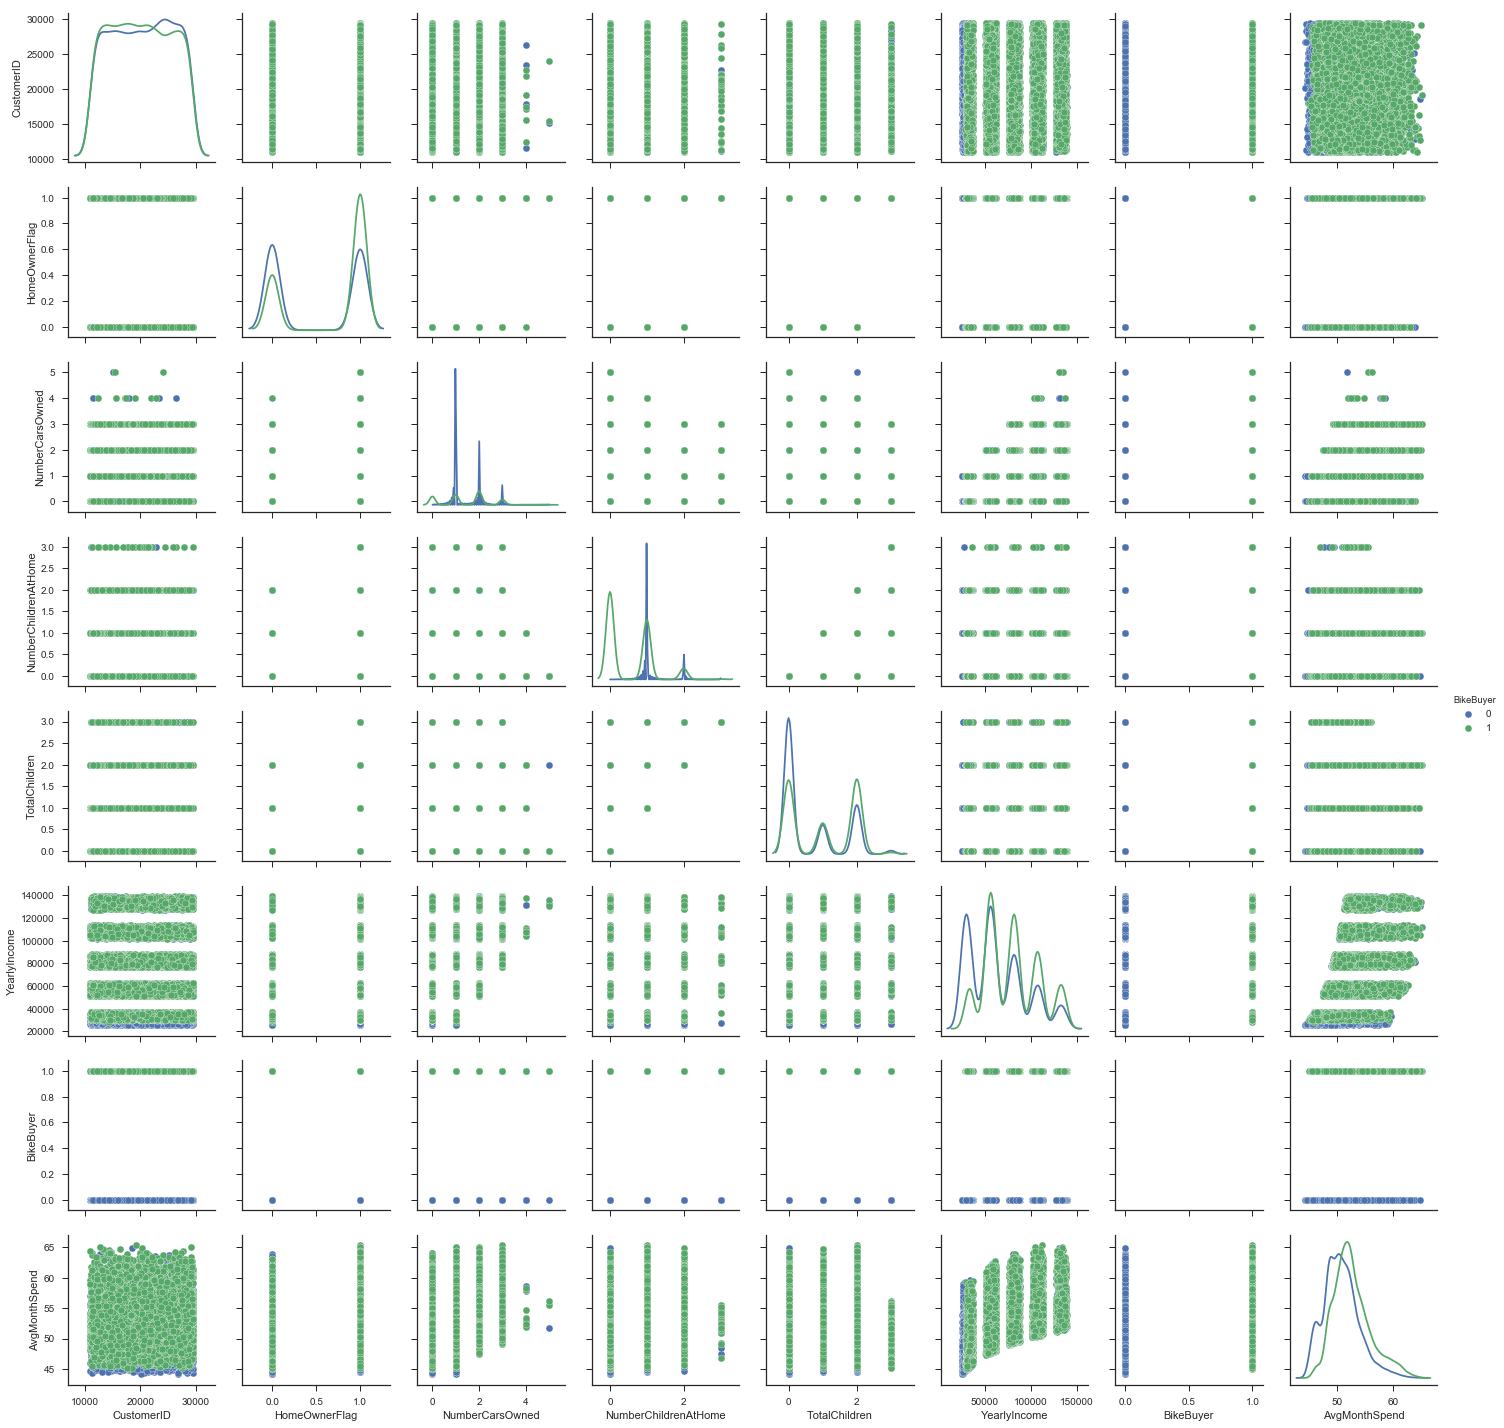

In [8]:
# visualization
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
plt.show(sns.pairplot(mergedf, diag_kind="kde", hue="BikeBuyer"))

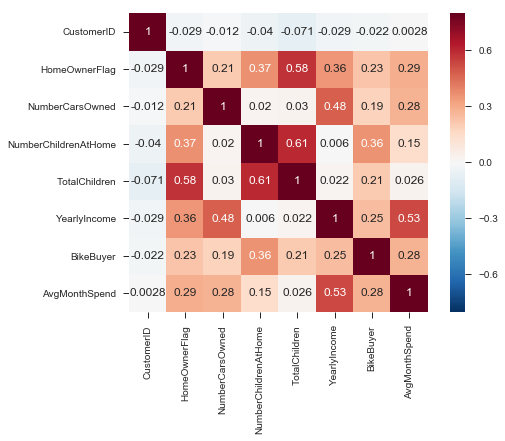

In [9]:
# correlation
plt.show(sns.heatmap(mergedf.corr(), vmax=.8, square=True, annot=True))

In [10]:
# question 1 Enter the following summary statistics you calculated for the AvgMonthSpend column.
sales.AvgMonthSpend.min()

44.100000000000001

In [11]:
# Maximum AvgMonthSpend
sales.AvgMonthSpend.max()

65.290000000000006

In [12]:
# Mean AvgMonthSpend
sales.AvgMonthSpend.mean()

51.76720675565248

In [13]:
# Median AvgMonthSpend
sales.AvgMonthSpend.median()

51.42

In [14]:
# Standard Deviation of AvgMonthSpend
sales.AvgMonthSpend.std()

3.438024087583443

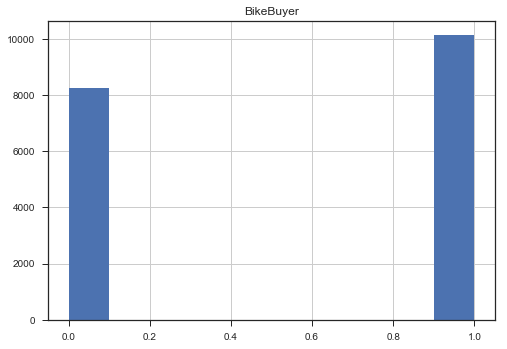

1    10127
0     8228
Name: BikeBuyer, dtype: int64

In [15]:
# Distribution of BikeBuyer
# A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).
plt.show(sales.hist(column = 'BikeBuyer'))
sales.BikeBuyer.value_counts()

In [16]:
#YearlyIncome By Occupation
customers.YearlyIncome.groupby(customers.Occupation).median().sort_values()

Occupation
Manual             31151
Skilled Manual     56546
Clerical           81962
Management        107633
Professional      133057
Name: YearlyIncome, dtype: int64

In [17]:
sales.AvgMonthSpend.groupby(customers.Occupation).median().sort_values()

Occupation
Manual            51.340
Skilled Manual    51.400
Clerical          51.480
Management        51.485
Professional      51.510
Name: AvgMonthSpend, dtype: float64

In [18]:
# Which group of customers accounts for a distinctly high range of AvgMonthSpend values?
# a) Females aged between 19 and 25
# b) Males aged between 19 and 25
# c) Females aged between 30 and 50
# d) Males aged between 30 and 50

from datetime import datetime
from dateutil.relativedelta import relativedelta

for i in customers.index:
    customers.at[i, 'BirthDate'] = datetime.strptime(customers.ix[i, 'BirthDate'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'LastUpdated'] = datetime.strptime(customers.ix[i, 'LastUpdated'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'Age'] = relativedelta(customers.ix[i, 'LastUpdated'], customers.ix[i, 'BirthDate']).years
customers.Age.unique()

array([ 29.,  44.,  31.,  39.,  42.,  45.,  19.,  40.,  18.,  35.,  32.,
        56.,  25.,  51.,  24.,  53.,  36.,  55.,  20.,  27.,  26.,  33.,
        30.,  38.,  28.,  34.,  21.,  22.,  50.,  23.,  59.,  17.,  46.,
        48.,  49.,  41.,  57.,  58.,  54.,  43.,  47.,  37.,  52.,  16.,
        62.,  61.,  83.,  60.,  64.,  63.,  77.,  66.,  65.,  75.,  73.,
        67.,  71.,  72.,  70.,  68.,  74.,  80.,  69.,  84.,  79.,  86.,
        76.,  78.,  85.,  81.])

In [19]:
def LongLife(customers):
    if  19 <= customers['Age'] <= 25:
        return 1
    elif 30 <= customers['Age'] <= 50:
        return 2
    else:
        return 0

customers['AgeGroup'] = customers.apply(LongLife, axis=1)
customers['AgeGroup'].unique()

array([0, 2, 1], dtype=int64)

In [20]:
sales.AvgMonthSpend.groupby([customers.Gender, customers.AgeGroup]).mean().sort_values()
# answear: b) Males aged between 19 and 25

Gender  AgeGroup
M       0           51.644403
        2           51.714894
F       0           51.792385
        1           51.828390
        2           51.829339
M       1           51.838650
Name: AvgMonthSpend, dtype: float64

In [21]:
# Which of the following statements about AvgMonthSpend are true?
# A) Married customers have a higher median AvgMonthSpend than single customers.
sales.AvgMonthSpend.groupby(customers.MaritalStatus).median().sort_values()
# answear: True

MaritalStatus
S    51.40
M    51.44
Name: AvgMonthSpend, dtype: float64

In [22]:
# Which of the following statements about AvgMonthSpend are true?
# B) Customers with no car have a higher median AvgMonthSpend than customers with one or more cars.

def Car(customers):
  if customers['NumberCarsOwned'] == 0:
    return 0
  else:
    return 1

customers['Cars'] = customers.apply(Car, axis=1)

sales.AvgMonthSpend.groupby(customers.Cars).median().sort_values()
# answear: False

Cars
0    51.415
1    51.430
Name: AvgMonthSpend, dtype: float64

In [23]:
# Which of the following statements about AvgMonthSpend are true?
# C) Male customers have a higher median AvgMonthSpend than female customers.
sales.AvgMonthSpend.groupby(customers.Gender).median().sort_values()
# answear: False

Gender
M    51.385
F    51.490
Name: AvgMonthSpend, dtype: float64

In [24]:
# Which of the following statements about AvgMonthSpend are true?
# D) Female customers have a wider range of AvgMonthSpend values than male customers.
# sales.AvgMonthSpend.groupby(customers.Gender).max() - sales.AvgMonthSpend.groupby(customers.Gender).min()
# answear: True

In [25]:
# Which of the following statements about AvgMonthSpend are true?
# E) Customers with no children at home have a lower median AvgMonthSpend values 
#    than customers with one or more children at home.

def Children(customers):
  if customers['NumberChildrenAtHome'] == 0:
    return 0
  else:
    return 1

customers['Children'] = customers.apply(Children, axis=1)

sales.AvgMonthSpend.groupby(customers.Children).median().sort_values()
# answear: True

Children
0    51.42
1    51.44
Name: AvgMonthSpend, dtype: float64

In [26]:
# Which of the following statements about BikeBuyer are true?
# a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
customers.YearlyIncome.groupby(sales.BikeBuyer).median().sort_values()
# answear: True

BikeBuyer
0.0    61808
1.0    61874
Name: YearlyIncome, dtype: int64

In [27]:
# Which of the following statements about BikeBuyer are true?
# b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
customers.NumberCarsOwned.groupby(sales.BikeBuyer).median().sort_values()
# answear: False

BikeBuyer
0.0    1
1.0    1
Name: NumberCarsOwned, dtype: int64

In [28]:
# Which of the following statements about BikeBuyer are true?
# c) The most common occupation type for customers who bought a bike is skilled manual.
customers.Occupation.groupby([sales.BikeBuyer]).value_counts().sort_values()
# answear: True

BikeBuyer  Occupation    
0.0        Professional       706
1.0        Professional       896
0.0        Management        1276
           Manual            1540
1.0        Management        1582
           Manual            1836
0.0        Clerical          1987
1.0        Clerical          2476
0.0        Skilled Manual    2719
1.0        Skilled Manual    3337
Name: Occupation, dtype: int64

In [29]:
# Which of the following statements about BikeBuyer are true?
# d)  Most of the customers who bought a bike are male.
customers.Gender.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  Gender
0.0        F         3988
           M         4240
1.0        M         5046
           F         5081
Name: Gender, dtype: int64

In [30]:
# Which of the following statements about BikeBuyer are true?
# d) Most of the customers who bought a bike are single
customers.MaritalStatus.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  MaritalStatus
0.0        S                3817
           M                4411
1.0        S                4594
           M                5533
Name: MaritalStatus, dtype: int64